In [1]:
!pip install ultralytics --quiet
import ultralytics
ultralytics.checks()

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/107.7 GB disk)


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.5MB/s]


In [4]:
from google.colab import files
uploaded = files.upload()

Saving 00285.jpg to 00285.jpg


In [5]:
import PIL.Image

image_path = next(iter(uploaded)) # Get the filename
results = model(image_path)


image 1/1 /content/00285.jpg: 448x640 1 car, 363.6ms
Speed: 15.7ms preprocess, 363.6ms inference, 31.3ms postprocess per image at shape (1, 3, 448, 640)


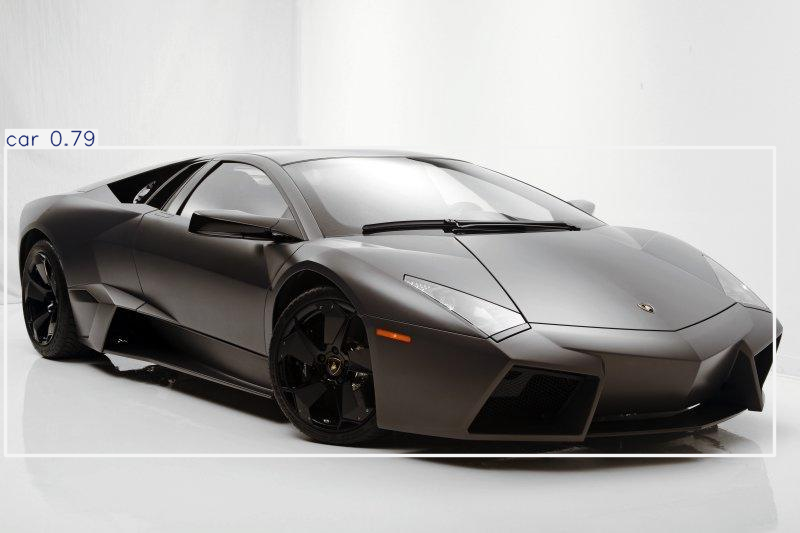

In [6]:
results[0].show()


image 1/1 /content/00285.jpg: 448x640 1 car, 171.3ms
Speed: 3.8ms preprocess, 171.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Detected 1 cars.


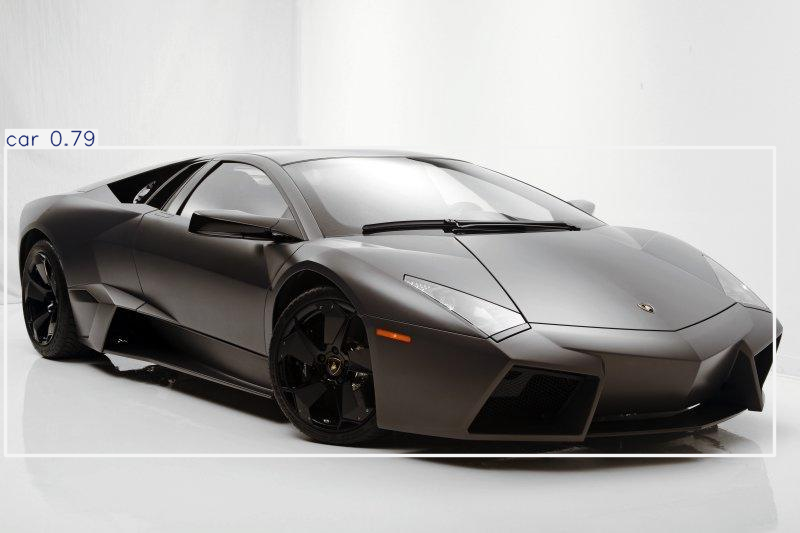

[ultralytics.engine.results.Boxes object with attributes:
 
 cls: tensor([2.])
 conf: tensor([0.7903])
 data: tensor([[  5.1191, 147.8389, 774.5806, 455.0538,   0.7903,   2.0000]])
 id: None
 is_track: False
 orig_shape: (533, 800)
 shape: torch.Size([1, 6])
 xywh: tensor([[389.8499, 301.4463, 769.4615, 307.2149]])
 xywhn: tensor([[0.4873, 0.5656, 0.9618, 0.5764]])
 xyxy: tensor([[  5.1191, 147.8389, 774.5806, 455.0538]])
 xyxyn: tensor([[0.0064, 0.2774, 0.9682, 0.8538]])]

In [7]:
def detect_cars(image_path):
  results = model(image_path)
  boxes = results[0].boxes
  car_boxes = []
  for box in boxes:
    cls = int(box.cls[0])
    if cls == 2: # class 2 = car
      car_boxes.append(box)
      print(f"Detected {len(car_boxes)} cars.")
    results[0].show()
  return car_boxes

detect_cars(image_path)

In [8]:
from google.colab import files
uploaded_video = files.upload()
video_path = next(iter(uploaded_video))

Saving 2099536-hd_1920_1080_30fps.mp4 to 2099536-hd_1920_1080_30fps.mp4


In [9]:
results = model(video_path, save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/605) /content/2099536-hd_1920_1080_30fps.mp4: 384x640 8 persons, 7 cars, 1 bus, 1 truck, 171.1ms
video 1/1 (frame 2/605) /content/2099536-hd_1920_1080_30fps.mp4: 384x640 10 persons, 3 cars, 1 bus, 1 truck, 156.9ms
video 1/1 (frame 3/605) /content/2099536-hd_1920_1080_30fps.mp4: 384x640 7 persons, 4 cars, 1 bus, 158.8ms
video 1/1 (frame 4/605) /content/2099536-hd_1920_1080_30fps.mp4: 384x640 7 persons, 5 cars, 141.6ms
video 1/1 (frame

In [10]:
print("Output saved to:", results[0].save_dir)

Output saved to: runs/detect/predict


hat is Object Detection?
Object detection is a computer vision task that involves identifying and locating objects (like cars, people, animals) in an image or video. Unlike classification, which labels an entire image, object detection also draws bounding boxes around each object of interest.

🔹 What is YOLO?
YOLO (You Only Look Once) is a family of real-time object detection algorithms developed by Joseph Redmon and others. It treats object detection as a single regression problem, directly predicting bounding boxes and class probabilities from full images in one evaluation.

In contrast to older systems (e.g., R-CNN) that use region proposals, YOLO does everything in one go — hence the name.

⚙️ HOW YOLO WORKS

    Input image is divided into an S × S grid (e.g., 13×13).

    Each grid cell predicts:

        B bounding boxes (coordinates: x, y, width, height)

        Confidence score (how likely the box contains an object)

        C class probabilities (for object categories like car, dog, person)

    YOLO outputs (S × S × (B×5 + C)) predictions per image.

    After prediction, it applies:

        Non-Max Suppression (NMS): To remove overlapping boxes

        Confidence threshold: To eliminate weak detections

🧠 Key Advantages of YOLO

    Fast: Processes images in real-time (~30+ FPS with small models)

    Global reasoning: YOLO sees the entire image during training and test time

    Unified: Single network, end-to-end differentiable

🔍 YOLO Versions Overview
Version	Notes
YOLOv1	Introduced the concept
YOLOv3	Most widely used before YOLOv5
YOLOv5	Easy to use, high performance
YOLOv8	Latest from Ultralytics, supports classification, detection, segmentation

We used YOLOv8 in this experiment.

🧪 Car Detection Using YOLOv8

🔸 Tools Used:

    Python with Ultralytics YOLOv8

    Google Colab (for cloud-based GPU inference)

    Pretrained model: yolov8n.pt (nano variant for speed)

🔸 Process:

    Load a pretrained YOLOv8 model

    Upload an image or video containing cars

    Run detection

    View/save output with bounding boxes and class labels

🧾 Output

    Detected cars are marked with bounding boxes and confidence scores.

    The output image/video is saved to a /runs/detect directory.

🧠 Applications of Car Detection

    Self-driving cars (detect nearby vehicles, pedestrians)

    Surveillance systems (monitoring vehicles)

    Traffic analysis and counting

    Smart parking systems